In [14]:
import os
import csv
import pandas as pd
import seaborn as sns
from scipy.interpolate import make_interp_spline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [12]:
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
file_dir = path + "/Deep_nets/e2efold-master/models_ckpt/"

epoch_list, train_val_loss, epoch_time = [],[],[]

with open(file_dir+"latest_run_1.txt") as file:
    lines = file.readlines()

total_epochs = lines.pop(0)
total_time = lines.pop()


for line in lines:
    split_line = line.split(", ")
    epoch_list.append(int(split_line[0]))
    train_val_loss.append([float(split_line[1]),float(split_line[2]), float(split_line[3])])
    epoch_time.append(float(split_line[4]))
print (len(epoch_list))
print (len(train_val_loss))

with open(file_dir+"latest_run_2.txt") as file:
    lines = file.readlines()

total_time = float(total_time) + float(lines.pop()[:-2])
total_epochs = float(total_epochs) + len(lines)
first = True

for line in lines:
    split_line = line.split(", ")
    epoch_list.append(total_epochs + int(split_line[0]))
    train_val_loss.append([float(split_line[1]),float(split_line[2]), float(split_line[3])])
    if first:
        epoch_time.append(float(split_line[4]))
        aux_1 = float(split_line[4])
        first = False
    else:
        #print(float(split_line[4])-float(epoch_time[-1]))
        epoch_time.append(float(split_line[4])-aux_1)
        aux_1 = float(split_line[4])

total_epochs = float(total_epochs) + len(lines)
print (len(epoch_list))
print (len(train_val_loss))

df = pd.DataFrame(train_val_loss,index= epoch_list, columns=["Train Loss", "Val Loss", "Val F1"])
print((epoch_time))


50
50
60
60
[223.63240337371826, 219.2320966720581, 222.6012692451477, 221.8496356010437, 223.04785108566284, 224.431058883667, 226.66455936431885, 224.7980079650879, 224.55192875862122, 223.92483377456665, 222.03089118003845, 216.1470081806183, 210.59858632087708, 204.77996349334717, 210.50981879234314, 215.0757131576538, 210.71500372886658, 214.1976718902588, 208.47282242774963, 216.1574399471283, 213.30437088012695, 218.66770958900452, 213.95035243034363, 218.12675714492798, 216.02937364578247, 217.5959508419037, 210.78628993034363, 199.45710015296936, 201.19686436653137, 199.26607131958008, 200.43177151679993, 205.17928266525269, 201.49086713790894, 204.50780844688416, 207.08726000785828, 205.01269006729126, 207.62774920463562, 204.8189115524292, 206.20839047431946, 222.98967266082764, 222.1622085571289, 218.25603318214417, 215.70338344573975, 209.5518674850464, 219.04976606369019, 218.78196835517883, 224.2648901939392, 214.8480794429779, 214.32324600219727, 219.23475408554077, 665

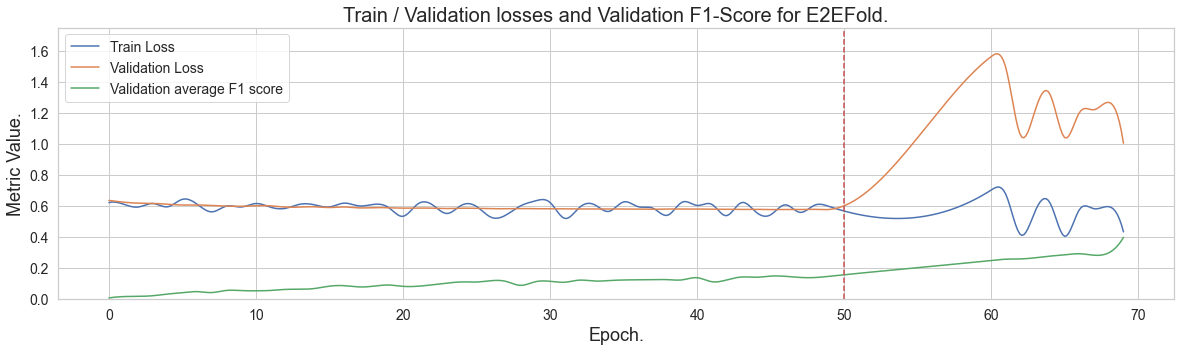

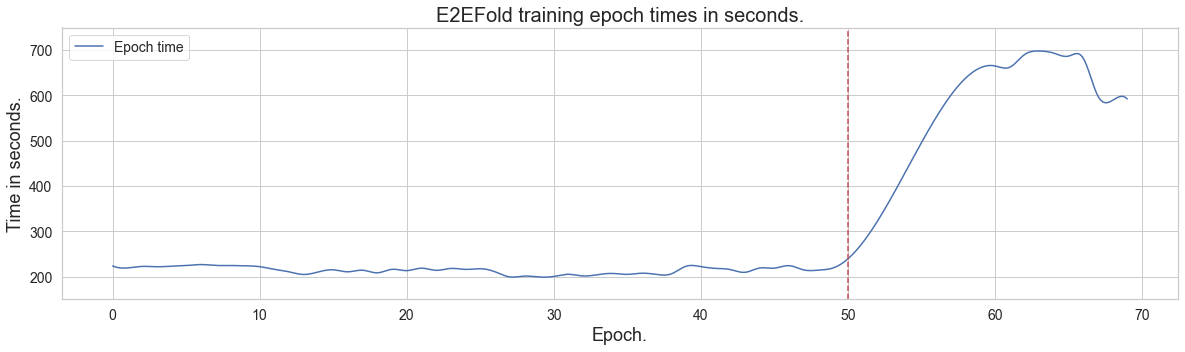

0.5871490051349004
0.6984911612892584
Total train time:  17272.215923070908
Total train minutes:  287.8702653845151


In [35]:
sns.set_theme(style="whitegrid")
val_loss_interpolator = make_interp_spline(epoch_list, list(df["Val Loss"]))
train_loss_interpolator = make_interp_spline(epoch_list, list(df["Train Loss"]))
f1_interpolator = make_interp_spline(epoch_list[:-1], list(df["Val F1"])[:-1])
epoch_time_interpolator = make_interp_spline(epoch_list, epoch_time)

X_ = np.linspace(epoch_list[0], epoch_list[-1], 500)
Val_ = val_loss_interpolator(X_)
Train_ = train_loss_interpolator(X_)
F1_ = f1_interpolator(X_)
Times_ = epoch_time_interpolator(X_)

f, ax = plt.subplots(figsize=(20, 5))
ax.plot(X_, Train_, label='Train Loss')
ax.plot(X_, Val_, label='Validation Loss')
ax.plot(X_, F1_, label='Validation average F1 score')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


ax.legend()
plt.ylim(0, 1.75)
plt.axvline(x=50, linestyle="--", color="r")
plt.xlabel("Epoch.", fontsize=18)
plt.ylabel("Metric Value.", fontsize=18)
plt.title("Train / Validation losses and Validation F1-Score for E2EFold.", fontsize=20)
plt.legend(loc=2, prop={'size': 14})
plt.show()


f, ax = plt.subplots(figsize=(20, 5))
ax.plot(X_, Times_, label='Epoch time')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

ax.legend()
plt.ylim(150, 750)
plt.axvline(x=50, linestyle="--", color="r")
plt.xlabel("Epoch.", fontsize=18)
plt.ylabel("Time in seconds.", fontsize=18)
plt.title("E2EFold training epoch times in seconds.", fontsize=20)
plt.legend(loc=2, prop={'size': 14})
plt.show()

print(np.mean(df["Train Loss"].values))
print(np.mean(df["Val Loss"].values))
print("Total train time: ", np.sum(epoch_time))
print("Total train minutes: ", np.sum(epoch_time)/60)


In [47]:
np.average(epoch_time)

287.8702653845151